### Student Information
Name:楊智均

Student ID:111033593

GitHub ID:y880916c

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

### PART1.Take Home exercised
copy needed information

In [1]:
%load_ext autoreload
%autoreload 2
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [2]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target

X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### Exercise 2 (take home):
Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information.

In [3]:
#use head to query 
X.head(5)

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian


###  Exercise 5 (take home)
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.

In [4]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [5]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

The value in CDF is not none the type of these is str, so it will not work by using isnull function.

### Exercise 6 (take home):
Notice any changes to the X dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.

In [6]:
X_sample = X.sample(n=1000) #random state

In [7]:
X_sample[0:4]

,text,category,category_name
1760,From: ch41@prism.gatech.EDU (claye hart) Subje...,1,comp.graphics
224,From: jkjec@westminster.ac.uk (Shazad Barlas) ...,3,soc.religion.christian
1136,From: jbalgley@bbn.com (Jon Balgley) Subject: ...,1,comp.graphics
174,From: luom@storm.cs.orst.edu (Luo Martha BaoMi...,3,soc.religion.christian


In [8]:
X[0:4]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian


In [9]:
print(len(X))
print(len(X_sample))

2257
1000


1.We can notice that the sort in X is random by using sample.
2.The lenth of X changes.

### Exercise 8 (take home):
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

                        category_name  category_name
soc.religion.christian            599            262
sci.med                           594            266
comp.graphics                     584            254
alt.atheism                       480            218


<AxesSubplot: title={'center': 'Category distribution'}>

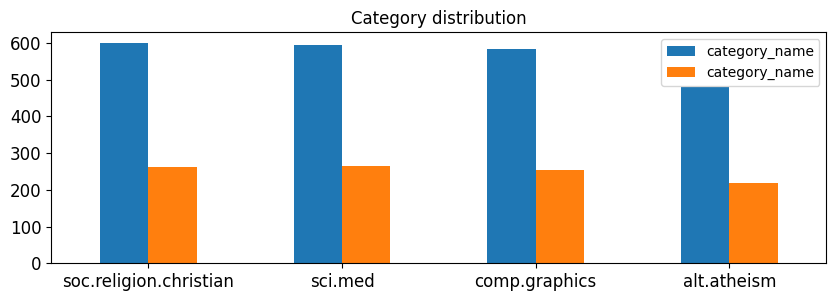

In [10]:
a=[X.category_name.value_counts()]
b=[X_sample.category_name.value_counts()]
d1=pd.DataFrame(a)
d2=pd.DataFrame(b)
d3=pd.concat([d1,d2], ignore_index=False)     #comcat 2 dataframe
d3=d3.T         #change the perform column
print(d3)
d3.plot(kind='bar',title = 'Category distribution',rot = 0, fontsize = 12, figsize = (10,3))

###  Exercise 10 (take home):
We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [11]:
import nltk
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
analyze = count_vect.build_analyzer()
#answer here
a = X_counts[0:5, 0:50].toarray()[4]
for i in range(len(a)):
    if a[i]==1:
        print(count_vect.get_feature_names_out()[i])

00
01


### Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

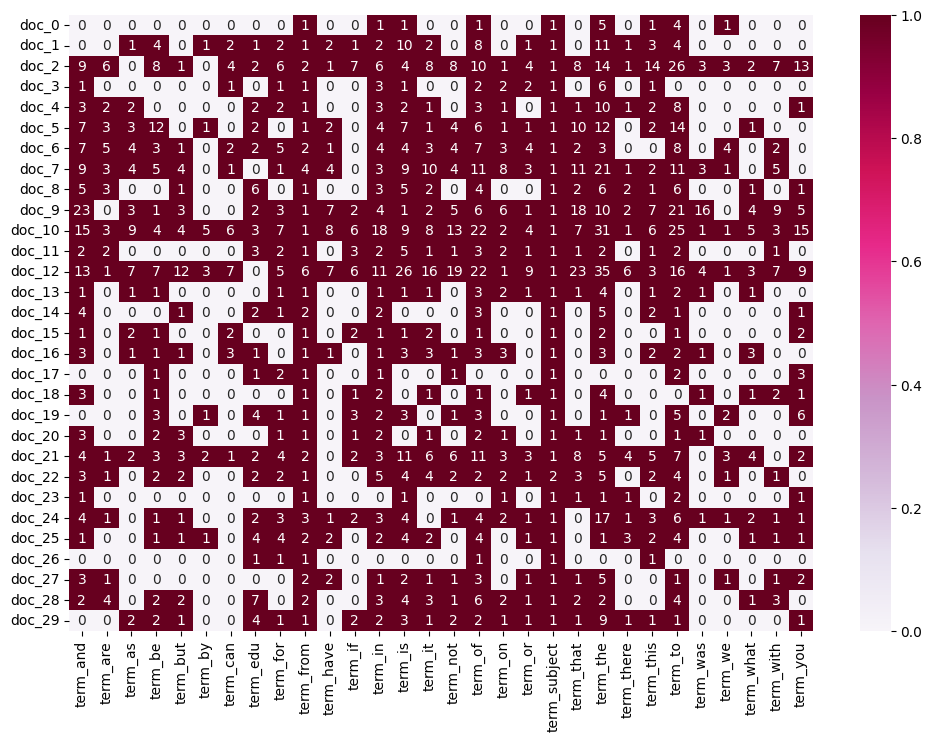

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
count_vect = CountVectorizer(max_features=30)       #choose the top 30 max feature
X_counts = count_vect.fit_transform(X.text)
plot_x=["term_"+str(i) for i in count_vect.get_feature_names_out()[0:30]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:30]]
plot_z = X_counts[0:30, 0:30].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(12, 8))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)


### Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

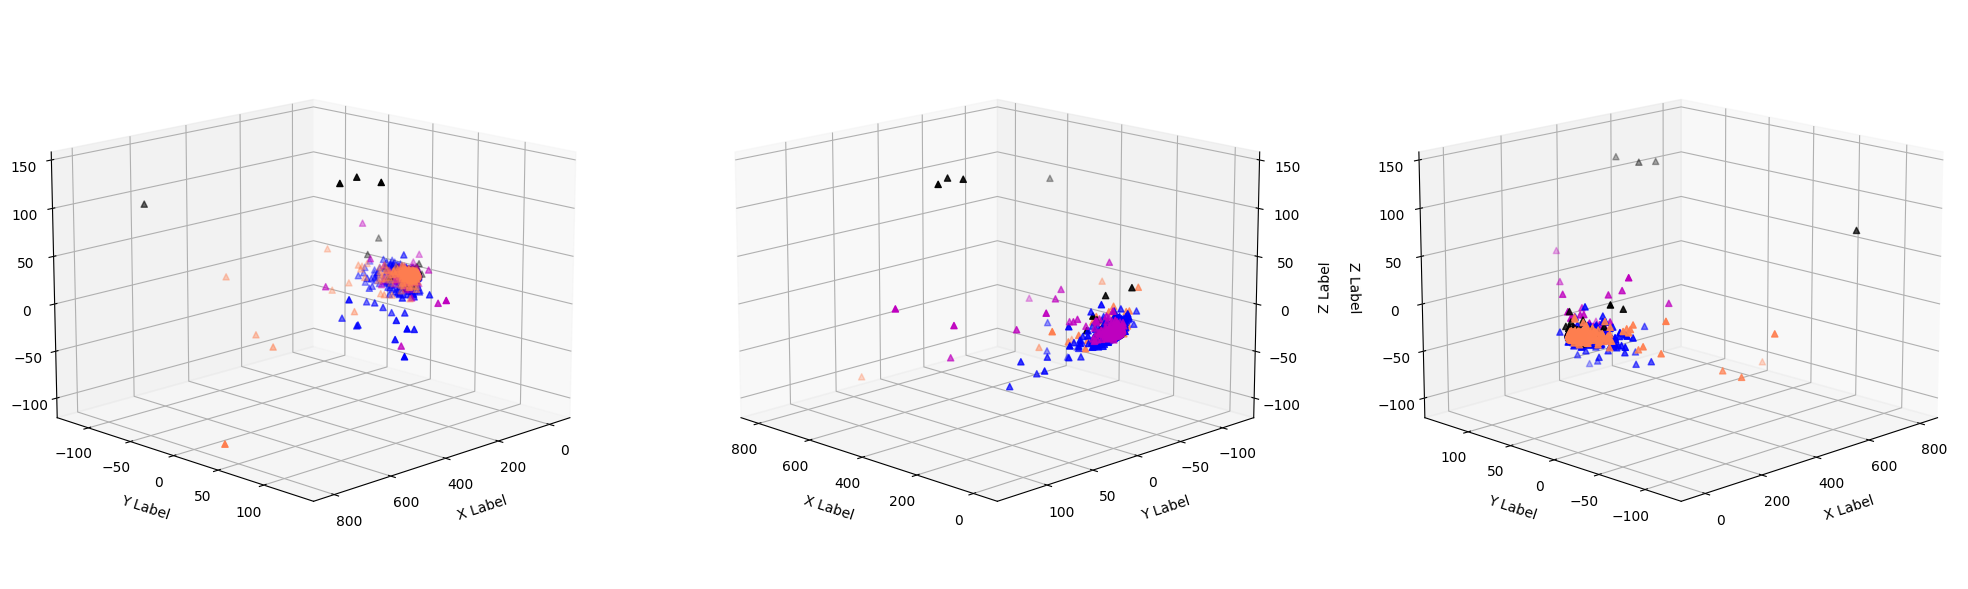

In [13]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = []
for i in range(3):
    ax.append(fig.add_subplot(1, 3, i+1, projection='3d'))
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax[i].scatter(xs,ys,zs, c = c, marker='^')

    ax[i].grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax[i].set_xlabel('\nX Label')
    ax[i].set_ylabel('\nY Label')
    ax[i].set_zlabel('\nZ Label')
    ax[i].view_init(elev=15, azim=45*(2*i+1))     #show the performace angle
plt.show()


### Exercise 13 (take home):
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [14]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
# Answer here
import plotly.express as px

#plot bar chart of term 0-300
fig = px.bar(term_frequencies[0:300], x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
fig.show()


### Exercise 14 (take home):
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [15]:
count_vect = CountVectorizer(max_features=100)   #Choose the top100 max feature to perform
X_counts = count_vect.fit_transform(X.text)
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
fig = px.bar(term_frequencies[0:100], x=count_vect.get_feature_names_out()[0:100] ,  
             y=term_frequencies[0:100])
fig.show()

### Exercise 15 (take home):
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

In [16]:
# Answer here
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
A=term_frequencies[np.argsort(-term_frequencies)]
fig = px.bar(A[0:300], x=count_vect.get_feature_names_out()[A[0:300]] ,  
             y=A[0:300])
fig.show()


### Exercise 16 (take home):
Try to generate the binarization using the category_name column instead. Does it work?

In [17]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

# Answer here
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]


#yes it works

,text,category,category_name,unigrams,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


### PART2.follow master with new data

#### 2.data preparation

In [18]:
from sklearn.utils import shuffle


s=['sentence','score']
amazon = pd.read_table("sentiment labelled sentences/amazon_cells_labelled.txt",header=None,names=s)
imdb= pd.read_table("sentiment labelled sentences/imdb_labelled.txt",header=None,names=s)
yelp= pd.read_table("sentiment labelled sentences/yelp_labelled.txt",header=None,names=s)
amazon['enterprise']='amazon'
imdb['enterprise']='imdb'
yelp['enterprise']='yelp'
A = pd.concat([amazon,imdb,yelp], ignore_index=True)
A


,sentence,score,enterprise
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
2743,I think food should have flavor and texture an...,0,yelp
2744,Appetite instantly gone.,0,yelp
2745,Overall I was not impressed and would not go b...,0,yelp
2746,"The whole experience was underwhelming, and I ...",0,yelp


In [19]:
A[0:2]

,sentence,score,enterprise
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon


In [20]:
len(A)

2748

#### 3.DATA transformation

##### 3.2 Familiarizing yourself with the Data

In [21]:
A[0:5][['enterprise','sentence']]

,enterprise,sentence
0,amazon,So there is no way for me to plug it in here i...
1,amazon,"Good case, Excellent value."
2,amazon,Great for the jawbone.
3,amazon,Tied to charger for conversations lasting more...
4,amazon,The mic is great.


query the last 10 records

In [22]:
A[-10:]

,sentence,score,enterprise
2738,The refried beans that came with my meal were ...,0,yelp
2739,Spend your money and time some place else.,0,yelp
2740,A lady at the table next to us found a live gr...,0,yelp
2741,the presentation of the food was awful.,0,yelp
2742,I can't tell you how disappointed I was.,0,yelp
2743,I think food should have flavor and texture an...,0,yelp
2744,Appetite instantly gone.,0,yelp
2745,Overall I was not impressed and would not go b...,0,yelp
2746,"The whole experience was underwhelming, and I ...",0,yelp
2747,"Then, as if I hadn't wasted enough of my life ...",0,yelp


In [23]:
# using loc (by label)
A.loc[:10, 'sentence']

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: sentence, dtype: object

In [24]:
# using iloc (by position)
A.iloc[:10, 2]

0    amazon
1    amazon
2    amazon
3    amazon
4    amazon
5    amazon
6    amazon
7    amazon
8    amazon
9    amazon
Name: enterprise, dtype: object

#### 4.Data Mining using Pandas

##### 4.1 Missing Values

In [25]:
# check missing values
A.isnull()

,sentence,score,enterprise
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2743,False,False,False
2744,False,False,False
2745,False,False,False
2746,False,False,False


In [26]:
A.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,enterprise
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [27]:
dummy_series = pd.Series(["dummy_record", 1], index=["sentence", "score"])
dummy_series

sentence    dummy_record
score                  1
dtype: object

In [28]:
dummy_series.to_frame().T
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
len(result_with_series)

2258

In [29]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name,unigrams,bin_category_name,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,1,1,1,1,1,2257,2257


In [30]:
# dummy record as dictionary format
dummy_dict = [{'sentence': 'dummy_record',
               'score': 1
              }]
A = pd.concat([A, pd.DataFrame(dummy_dict)], ignore_index=True)
len(A)


2749

In [31]:
A.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,enterprise
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [32]:
A.dropna(inplace=True)
A.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,enterprise
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [33]:
len(A)

2748

##### 4.2 Dealing with Duplicate Data

In [34]:
A.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [35]:
sum(A.duplicated())

17

In [36]:
sum(A.duplicated('sentence'))

17

In [37]:
A.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
len(A)

2714

#### 5.Data preprocessing

##### 5.1 Sampling

In [38]:
A_sample = A.sample(n=1000) #random state
len(A_sample)

1000

In [39]:
A_sample[0:4]

,sentence,score,enterprise
1760,The cashier had no care what so ever on what I...,0,yelp
2703,But then they came back cold.,0,yelp
1459,Macbeth (Jason Connery) moved me to tears with...,1,imdb
400,what a disappointment,0,amazon


yelp      992
amazon    980
imdb      742
Name: enterprise, dtype: int64


<AxesSubplot: title={'center': 'Enterprise distribution'}>

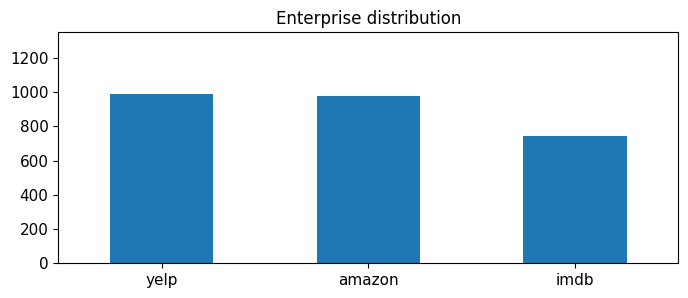

In [40]:
print(A.enterprise.value_counts())

# plot barchart for X
A.enterprise.value_counts().plot(kind = 'bar',
                                    title = 'Enterprise distribution',
                                    ylim = [0, 1350],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

yelp      371
amazon    349
imdb      280
Name: enterprise, dtype: int64


<AxesSubplot: title={'center': 'Category distribution'}>

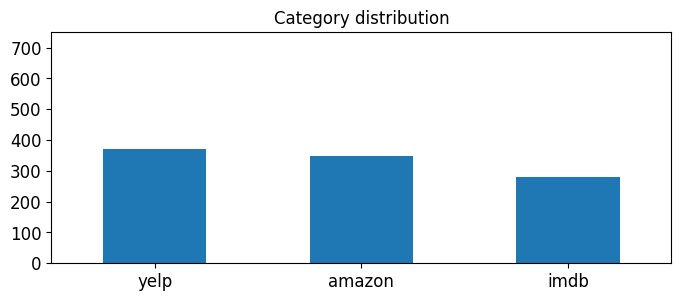

In [41]:
print(A_sample.enterprise.value_counts())

# plot barchart for X_sample
A_sample.enterprise.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 750], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

        enterprise  enterprise
yelp           992         371
amazon         980         349
imdb           742         280


<AxesSubplot: title={'center': 'Enterprise distribution'}>

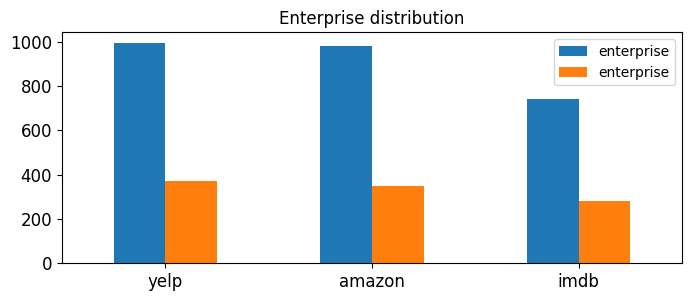

In [42]:
a=[A.enterprise.value_counts()]
b=[A_sample.enterprise.value_counts()]
d1=pd.DataFrame(a)
d2=pd.DataFrame(b)
d3=pd.concat([d1,d2], ignore_index=False)
d3=d3.T
print(d3)
d3.plot(kind='bar',title = 'Enterprise distribution',rot = 0, fontsize = 12, figsize = (8,3))

##### 5.2 Feature Creation

In [43]:
# takes a like a minute or two to process
A['unigrams'] = A['sentence'].apply(lambda x: dmh.tokenize_text(x))
A[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [44]:
A[0:4]

,sentence,score,enterprise,unigrams
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin..."


In [45]:
list(A[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

##### 5.3 Feature subset selection

In [46]:
count_vect = CountVectorizer()
A_counts = count_vect.fit_transform(A.sentence) #learn the vocabulary and return document-term matrix
print(A_counts[0])

  (0, 4159)	1
  (0, 4543)	1
  (0, 2426)	1
  (0, 3042)	1
  (0, 4985)	1
  (0, 1828)	1
  (0, 2808)	1
  (0, 4607)	1
  (0, 3385)	1
  (0, 2431)	1
  (0, 2313)	2
  (0, 2157)	1
  (0, 4529)	1
  (0, 4833)	1
  (0, 4791)	1
  (0, 1981)	1
  (0, 646)	1
  (0, 1012)	1


In [47]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [48]:
# We can check the shape of this matrix by:
A_counts.shape

(2714, 5153)

In [49]:
A_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [50]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [51]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:30]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(A.index)[0:30]]
plot_z = A_counts[0:30, 0:30].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

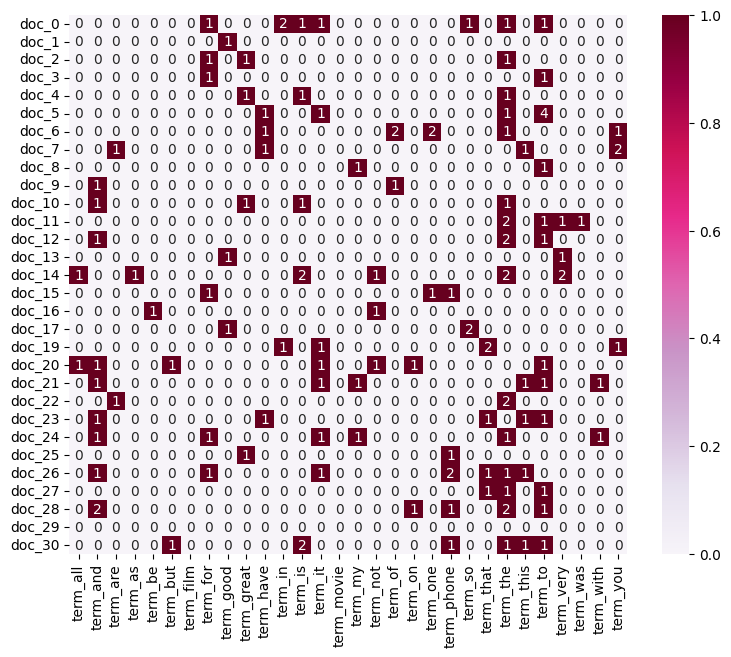

In [54]:
count_vect = CountVectorizer(max_features=30)
A_counts = count_vect.fit_transform(A.sentence)
plot_x=["term_"+str(i) for i in count_vect.get_feature_names_out()[0:30]]
plot_y = ["doc_"+ str(i) for i in list(A.index)[0:30]]
plot_z = A_counts[0:30, 0:30].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

##### 5.4 Dimensionality Reduction

In [55]:
categories = ["amazon", "imdb", "yelp"]
A_reduced = PCA(n_components = 2).fit_transform(A_counts.toarray())
A_reduced.shape

(2714, 2)

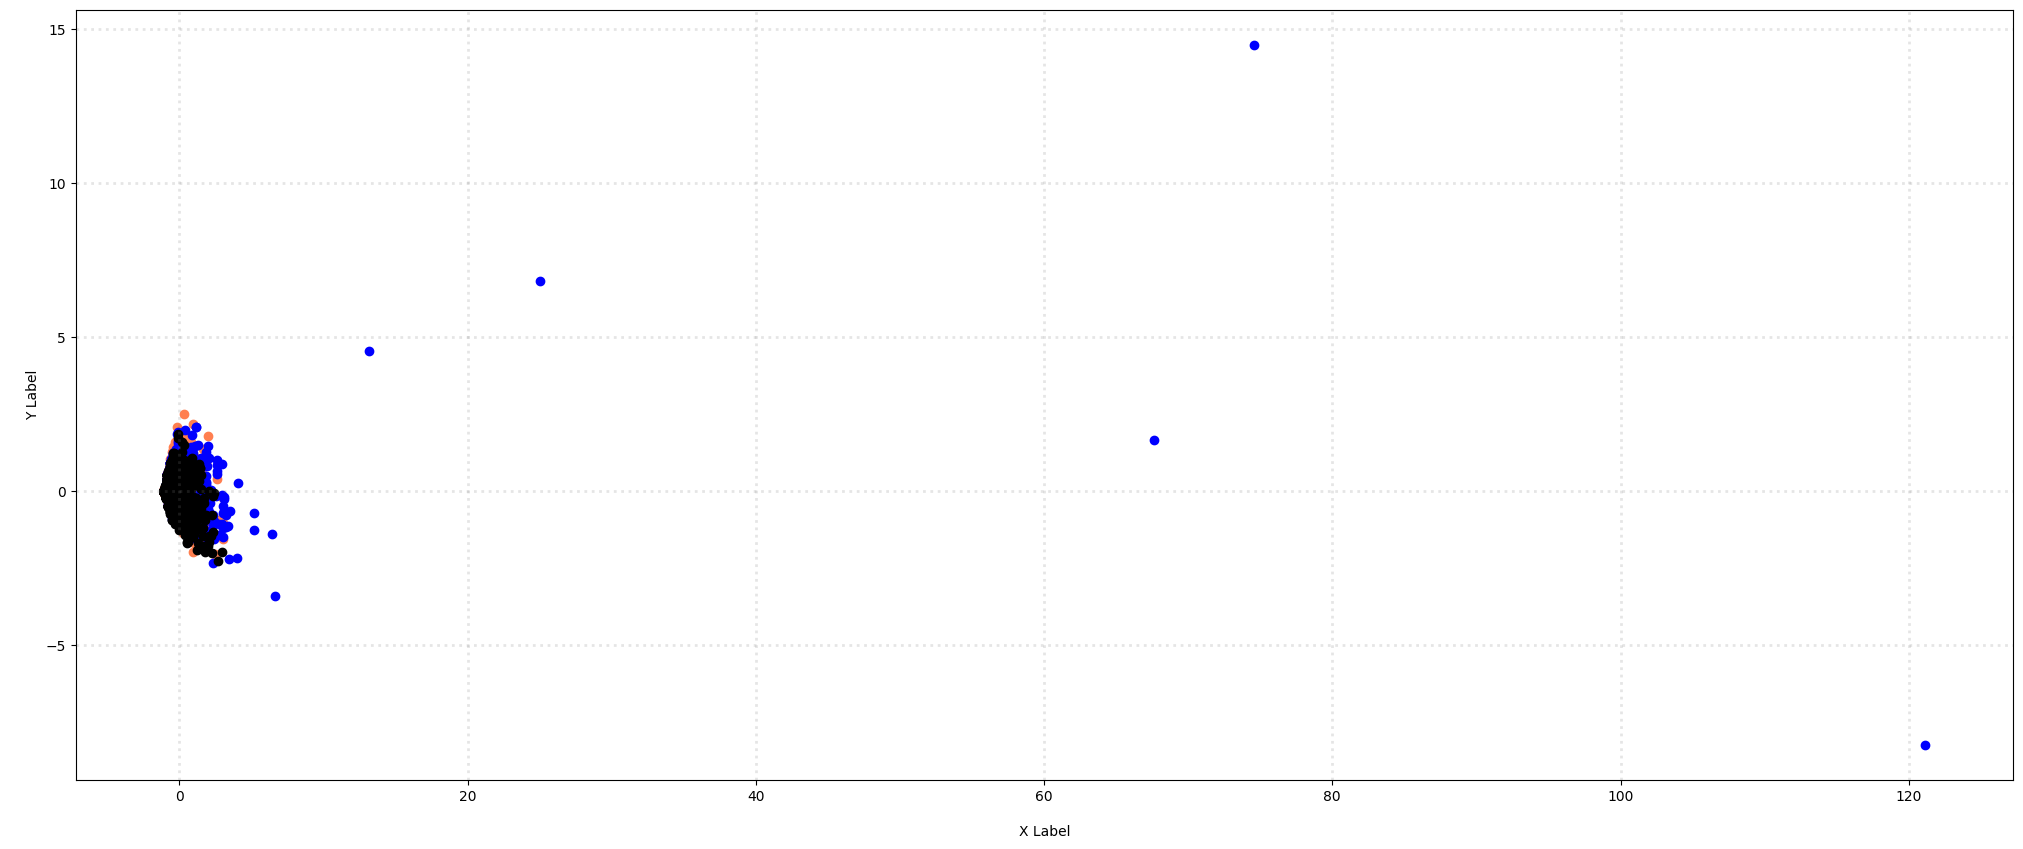

In [56]:
col = ['coral', 'blue', 'black','orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()


for c, category in zip(col, categories):
    xs = A_reduced[A['enterprise'] == category].T[0]
    ys = A_reduced[A['enterprise'] == category].T[1]
    
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

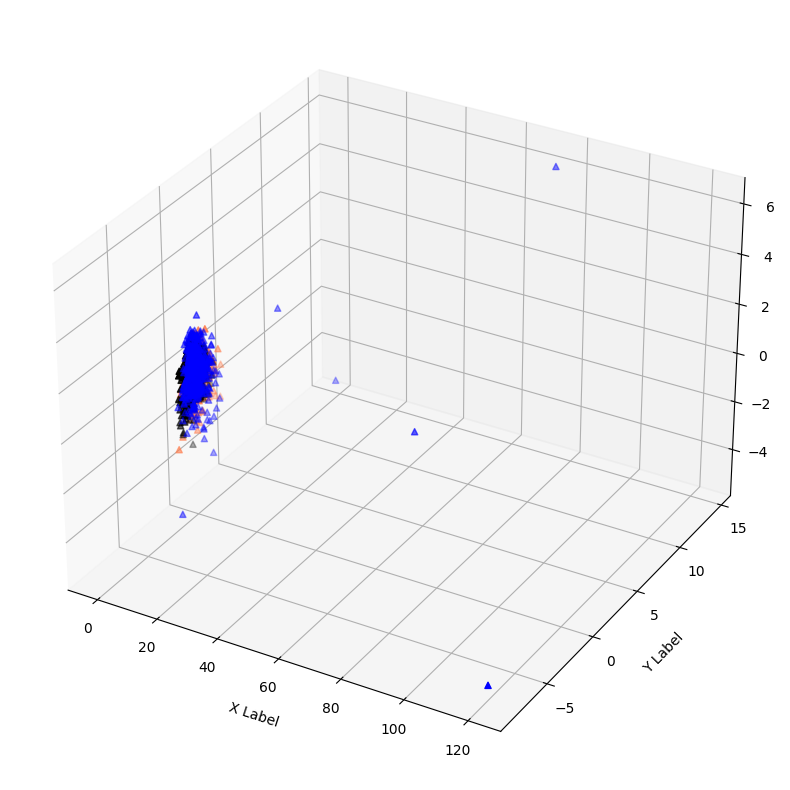

In [57]:
from mpl_toolkits.mplot3d import Axes3D
A_reduced = PCA(n_components = 3).fit_transform(A_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection ='3d')

for c, category in zip(col, categories):
    xs = A_reduced[A['enterprise'] == category].T[0]
    ys = A_reduced[A['enterprise'] == category].T[1]
    zs = A_reduced[A['enterprise'] == category].T[2]
    
    ax.scatter(xs, ys,zs, c = c, marker='^')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')


plt.show()

##### 5.5 Attribute Transformation / Aggregation

In [58]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,A_counts.shape[1]):
    term_frequencies.append(sum(A_counts[:,j].toarray()))
term_frequencies = np.asarray(A_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term

148

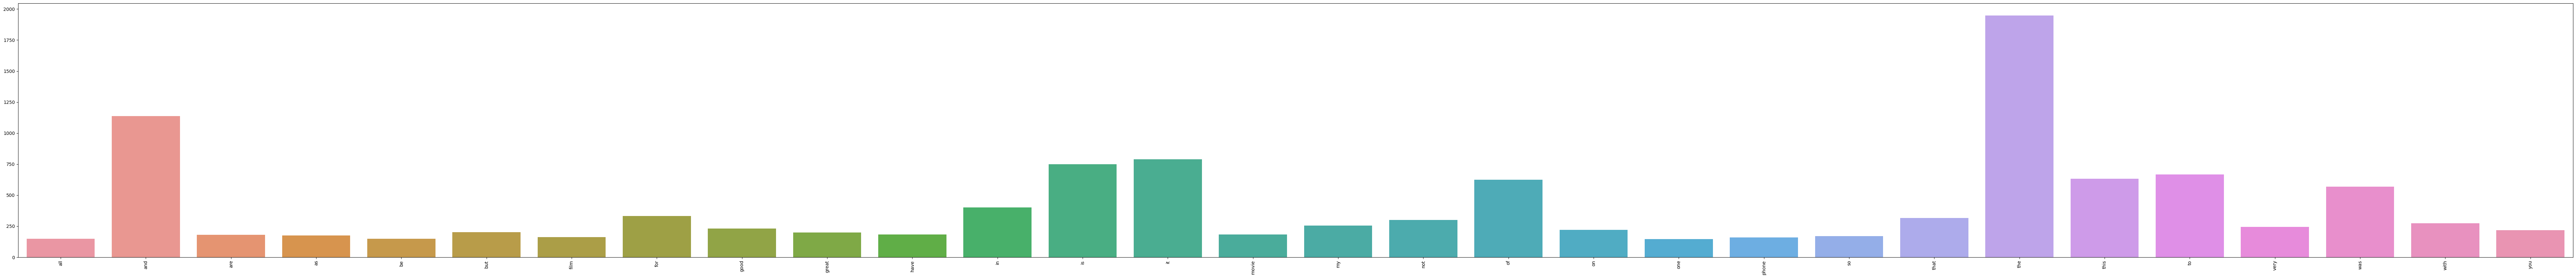

In [59]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

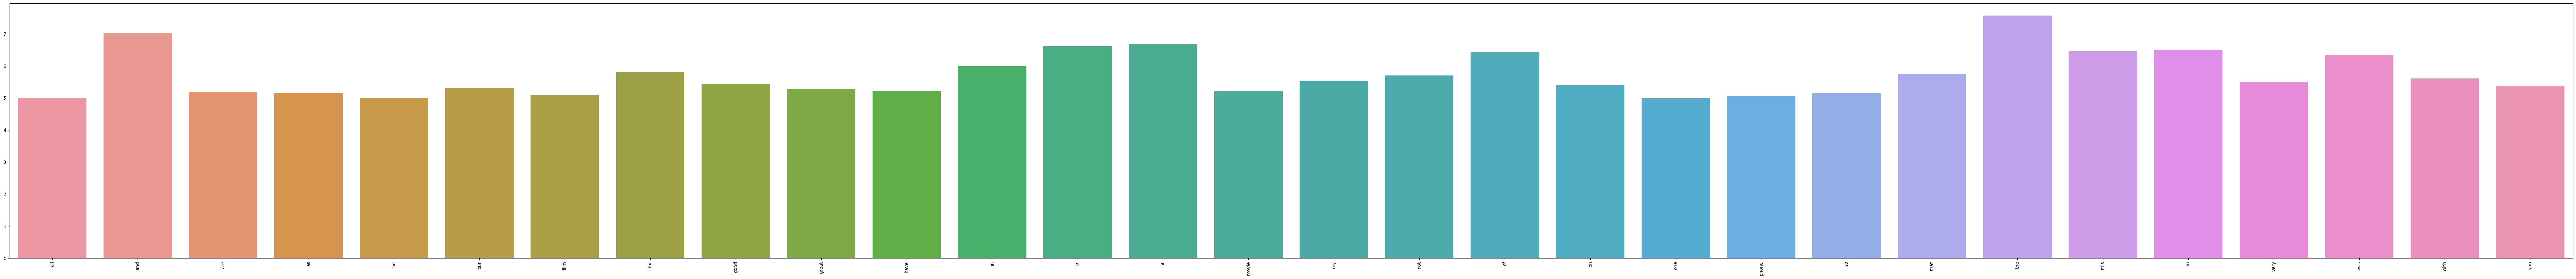

In [60]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

##### 5.6 Discretization and Binarization

In [62]:
mlb.fit(A.score)
A['bin_score'] = mlb.transform(A['score']).tolist()
A[0:9]

,sentence,score,enterprise,unigrams,bin_score
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,amazon,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,amazon,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,amazon,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,amazon,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,amazon,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


#### 6.Data Exploration

In [64]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = A.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = A.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = A.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [65]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [66]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]]


In [67]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


#### Part3.meaningful data visualing

##### 1.USE Donut Charts

In [68]:
C=A.enterprise.value_counts()
C

yelp      992
amazon    980
imdb      742
Name: enterprise, dtype: int64

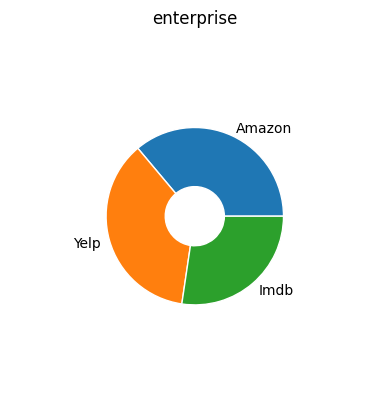

In [69]:
C=A.enterprise.value_counts()
Z=pd.DataFrame([
    ['Amazon', C[1]], ['Yelp', C[0]], ['Imdb',C[2]]],
    columns=['enterprise', 'count'])

fig, ax = plt.subplots()
size = 0.4
ax.pie(Z['count'], labels=Z['enterprise'],
       radius=1-size, wedgeprops=dict(width=size, edgecolor='w'))
plt.title('enterprise')
plt.show()

##### 2-1.TF-IDF

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
matrixvec = vectorizer.fit_transform(A.sentence)
A_tfidf = pd.DataFrame(matrixvec.toarray(), columns = vectorizer.get_feature_names_out())
print(A_tfidf.shape)
A_tfidf.head()


(2714, 5153)


,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### 2-2.Naive Bayes classifier

In [77]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
#for word frequency features
from sklearn.feature_extraction.text import CountVectorizer



cvt = CountVectorizer()
x = cvt.fit_transform(A['sentence'])
y=A['score']


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=22)

clf = MultinomialNB()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

print("test accuracy：",clf.score(x_test,y_test))

test accuracy： 0.8139963167587477


In [78]:
# for TF-UDF features
from sklearn.feature_extraction.text import TfidfVectorizer

x_train, x_test, y_train, y_test = train_test_split(A.sentence,A.score,test_size=0.2, random_state=22)

tf = TfidfVectorizer()
x_train = tf.fit_transform(x_train)
x_test = tf.transform(x_test)

clf = MultinomialNB(alpha=1.0)
clf.fit(x_train,y_train)
y_predict = clf.predict(x_test)

print("test accuracy：",clf.score(x_test,y_test))

test accuracy： 0.8158379373848987


#### PART4 What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

I think the sns.heatmap(seaborn) performace part is not inefficent.There are a lot of 0 in the heatmap.It makes the data not important.
If i meet this pb,i will try to highlight the meaningful value to perform .I will ignore the 0 value which has no meaning,too. 